# Intro

This is the second practical homework for the ML seminar. In this homework we will look at the following ideas (which are presented in the **first pages of the file containing the Notes for Seminar/Week 4**) and we will apply them using a decision tree and a Naive Bayes model:

- splitting data into:
  - (train, validation, test) or just...
  - ... (train, test) and using cross-validation (LOOCV or k-fold)
- choosing the best model from a set of models: decision tree using the information gain, decision tree using the Gini index, Gaussian Naive Bayes
- testing using your own images of drawn digits

We will use the output from the previous homework. (We give it to you below.)

Observation: All the algorithms we will use consider the input columns continuous and not discrete.

---


### Tools:

- other **packages** than those used in the first HW:
  - **sklearn**: "is an open source Python library that implements a range of machine learning, pre-processing, cross-validation and visualization algorithms using a unified interface." (text source: [here](https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/))
  - **matplotlib**: we use matplotlib.pyplot to show images on screen, but also for creating plots

# Get the output from the previous homework

In [10]:
# Data is at: https://docs.google.com/uc?export=download&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0
# Save the cookies needed for download:
!wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://drive.usercontent.google.com/download?id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0&export=download" -O-
# Load the cookies & download the .zip file:
!wget --load-cookies /tmp/cookies.txt "https://drive.usercontent.google.com/download?id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0&export=download&confirm=t" -O mnist_Xy.zip
# Clean up temporary cookies:
!rm /tmp/cookies.txt

<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv="content-type" content="text/html; charset=utf-8"/><style nonce="nFU57IBVOf2BDDyg-DwJjw">.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial,sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,.uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a

In [11]:
!unzip mnist_Xy.zip

Archive:  mnist_Xy.zip
  inflating: mnist_X.npy             
  inflating: mnist_y.npy             


In [8]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [12]:
import numpy as np
X = np.load("mnist_X.npy")
y = np.load("mnist_y.npy")

# Split data...

In [13]:
import sklearn
import sklearn.model_selection

## a) ... into (train, validation, test)

Use the following percentages 60% (train), 20% (for validation), 20% (for test).

Hint: Do not take the first 60% (train) rows of `X`, then the next 20% (validation), then the next 20% (test), because you will end up having in the training dataset only images of 0, 1, 2, 3, 4, 5!!! And in the validation dataset, images only of 5, 6, 7!!! And in the test dataset, only of 7, 8, 9!!! You should shuffle first the dataset or use a specialized function like `sklearn.model_selection.train_test_split`.

In [14]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#### Check distribution of labels in each subset

In the seminar notes, I told you an extra information that the distribution of labels (in train, validation, test) should be the same as in the original dataset. Check the following plots to see if this is the case.

You should see that this is *almost* the case. This is very good and acceptable! But if you want the distributions to be more alike, use the parameter `stratify` from the function `sklearn.model_selection.train_test_split` when splitting the original dataset (previous step).

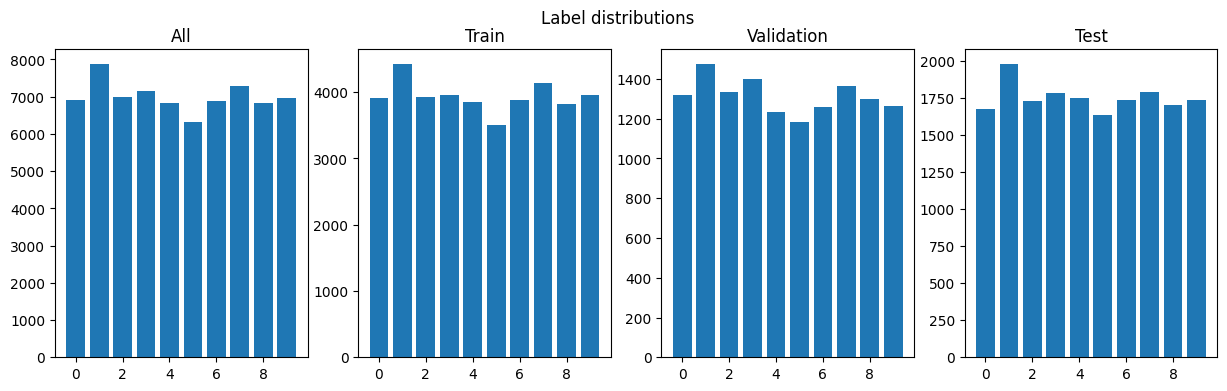

In [15]:
import matplotlib.pyplot as plt

(digits, counts_y) = np.unique(y, return_counts=True)
(_, counts_y_train) = np.unique(y_train, return_counts=True)
(_, counts_y_val) = np.unique(y_val, return_counts=True)
(_, counts_y_test) = np.unique(y_test, return_counts=True)

fig, (subplot_all, subplot_train, subplot_val, subplot_test) = plt.subplots(1,4,figsize=(15,4))
fig.suptitle('Label distributions')

subplot_all.bar(digits,counts_y)
subplot_all.set_title('All')

subplot_train.bar(digits,counts_y_train)
subplot_train.set_title('Train')

subplot_val.bar(digits,counts_y_val)
subplot_val.set_title('Validation')

subplot_test.bar(digits,counts_y_test)
subplot_test.set_title('Test')

fig.show()

"One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset." (from https://www.coursera.org/learn/neural-networks-deep-learning/notebook/zAgPl/logistic-regression-with-a-neural-network-mindset)

In [16]:
v = np.array([1,2,3])
# array programming
v > 2

array([False, False,  True])

In [17]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

for i in range(10):
  print(y_train)


[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]
[4 3 2 ... 4 1 1]


### Decision tree with "information gain"

#### Train a decision tree

Hint: Use `sklearn.tree` and use `criterion="entropy"` to have an algorithm close to ID3.

Also, show the training time.

Hint: Use a Google Colab magic to show the training time. See https://www.tutorialspoint.com/google_colab/google_colab_magics.htm

In [18]:
%%time
# training the model
import sklearn.tree as tree
id3_tree = tree.DecisionTreeClassifier(criterion = "entropy")
id3_tree.fit(X_train,y_train)



CPU times: user 13.1 s, sys: 66.4 ms, total: 13.2 s
Wall time: 13.4 s


DecisionTreeClassifier(criterion='entropy')

#### Compute accuracy on the training and validation datasets.

Hint: Use `model.score(INPUT,OUTPUT)` (or `sklearn.metrics.accuracy_score`).

In [19]:
# here we compute accuracy

print("training score:" , id3_tree.score(X_train,y_train))
print("validation score:" , id3_tree.score(X_val,y_val))

training score: 1.0
validation score: 0.8667428571428571


### Decision tree with "Gini index"

#### Train a decision tree

Also, show the training time.

In [20]:
%%time
gini_tree = tree.DecisionTreeClassifier(criterion= "gini")
gini_tree.fit(X_train,y_train)

CPU times: user 14.1 s, sys: 39.4 ms, total: 14.2 s
Wall time: 14.3 s


DecisionTreeClassifier()

#### Compute accuracy on the training and validation datasets.

Hint: Use `model.score(INPUT,OUTPUT)` (or `sklearn.metrics.accuracy_score`).

In [ ]:
print("Gini training score:",gini_tree.score(X_train,y_train))
print("Gini validation score:",gini_tree.score(X_val,y_val))

Gini training score: 1.0
Gini validation score: 0.8719642857142857


### Gaussian Naive Bayes

Observation: this is the Naive Bayes version which accepts as input continuous attributes.

#### Train a Naive Bayes model

Also, show the training time.

In [32]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

CPU times: user 411 ms, sys: 97.8 ms, total: 509 ms
Wall time: 512 ms


GaussianNB()

#### Compute accuracy on the training and validation datasets.

Hint: Use `model.score(INPUT,OUTPUT)` (or `sklearn.metrics.accuracy_score`).

In [33]:
print("Gaussian NB training score: ",gnb.score(X_train,y_train))
print("Gaussian NB validation score: ",gnb.score(X_val,y_val))

Gaussian NB training score:  0.5501714285714285
Gaussian NB validation score:  0.5471238095238096


### Choose the best model

**WRITE** HERE YOUR ANSWER AND EXPLAIN YOUR CHOICE

For our dataset, we chose ID3 because have a best validation accuracy ,instead naive bayes.

### Train the chosen model on `X_train,y_train` and `X_val,y_val` combined

In [ ]:
X_combined = np.concatenate((X_train,X_val))
y_combined = np.concatenate((y_train,y_val))
gnb.fit(X_combined, y_combined)  # Pass both X and y to fit


print("Gaussian NB training score: ", gnb.score(X_combined, y_combined))
print("Gaussian NB validation score: ", gnb.score(X_test, y_test))

Gaussian NB training score:  0.5610963455149501
Gaussian NB validation score:  0.5557619047619048


### Compute the testing accuracy of this new model

This number will play the role of an unbiased estimate of how well the model works in reality.

In [ ]:
# here we compute accuracy

print("training score:" , id3_tree.score(X_train,y_train))
print("validation score:" , id3_tree.score(X_val,y_val))

print("Gini training score:",gini_tree.score(X_train,y_train))
print("Gini validation score:",gini_tree.score(X_val,y_val))

print("Gaussian NB training score: ",gnb.score(X_train,y_train))
print("Gaussian NB validation score: ",gnb.score(X_val,y_val))

training score: 1.0
validation score: 0.8747321428571428
Gini training score: 1.0
Gini validation score: 0.8719642857142857
Gaussian NB training score:  0.5669642857142857
Gaussian NB validation score:  0.564375


### Test the new model on a new image of your own

In [ ]:
from PIL import Image
import numpy as np
def readImage(filePath,resize=None,colorMode=None):
  """Read an image from disk.

  Keyword arguments:
  filePath -- where the image is located on disk
  resize -- if not None, then it is of the form (imageHeight, imageWidth); the image will be resized accordingly
  colorMode -- if not None, then it is "rgb" or "grayscale"; the image will be converted to this mode
  """
  im = Image.open(filePath)
  if colorMode:
    if colorMode == "grayscale":
      colorMode = "L"
    elif colorMode == "rgb":
      colorMode = "RGB"
    im = im.convert(colorMode)
  if resize:
    im = im.resize(resize)
  im = np.asarray(im)
  return im

In [ ]:
fn ="/content/img.png"

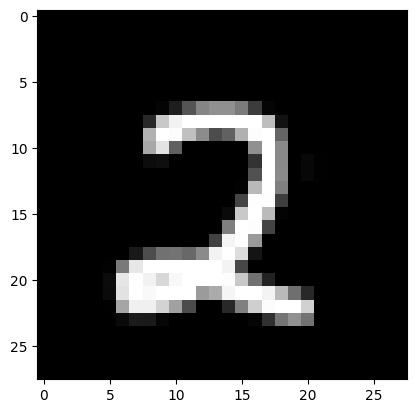

In [ ]:
test_img=readImage(fn,resize=(28,28),colorMode="grayscale")

test_img_procesed=np.array(test_img,dtype=np.float32)  # DONT'T FORGET TO PREPROCESS/STANDARDIZE as above!
test_img_procesed/=255
test_img_procesed = test_img_procesed.reshape((1,-1))

plt.imshow(test_img,cmap="gray")
#print(test_img_procesed)
#print(X_train[0])

In [36]:
flat_test_img = test_img.reshape((1,-1))
label = id3_tree.predict(flat_test_img)
print("The id3_tree model says this is digit ",label[0])

label = gini_tree.predict(flat_test_img)
print("The gini_tree model says this is digit ",label[0])

label = gnb.predict(flat_test_img)
print("The gnb model says this is digit ",label[0])

The id3_tree model says this is digit  5
The gini_tree model says this is digit  2
The gnb model says this is digit  2


## b) ... into (train,test) and use cross-validation (LOOCV or k-fold)

Use the following percentages 70% (train), 30% (for test).

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)


"One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset." (from https://www.coursera.org/learn/neural-networks-deep-learning/notebook/zAgPl/logistic-regression-with-a-neural-network-mindset)

In [ ]:
X_train = X_train/255
X_test = X_test/255


### Choose between LOOCV and k-fold CV

For each algorithm above estimate by hand (manually) the time necessary to apply LOOCV assuming that the time to train on 70\% of the data is the same as for training on 60\% of the data. You get this latter time from the output of a cell above where you used a Google Colab magic. If any time is more than 1 day (and it should be...), then you should use k-fold cross-validation instead of LOOCV.

Estimate in the same way the time for k-fold CV where k=10.

#### Decision tree with "information gain"

LOOCV

In [ ]:
%%time
import time
from sklearn.model_selection import LeaveOneOut
# initialize leave one out for training
loo = LeaveOneOut()
# split data in n splits(70k lines)
loo.get_n_splits(X_train)

# score
score = []

# time
sum_exec=0
time_iteration = 0

for train_index,test_index in loo.split(X_train):
  start_time = time.time()

  X_train_fold,X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold,y_test_fold = y_train[train_index],y_train[test_index]

  id3_tree.fit(X_train_fold,y_train_fold)

  score.append(id3_tree.score(X_test_fold,y_test_fold))

  end_time = time.time()
  sum_exec += end_time - start_time
  time_iteration+=1
  print("iteration :",time_iteration)
  if time_iteration == 3:
    # obtain mean in procents:
    mean_time = sum_exec/3 # in seconds
    est_time_seconds = mean_time*70000
    est_time_min = est_time_seconds/60
    est_time_hour=est_time_min/60
    est_time_days=est_time_hour/24
    print("Timpul estimat in zile este: ",est_time_days)
    if est_time_days >1:
      break

print("Medium accuracy : ",np.mean(score))


iteration : 1
iteration : 2
iteration : 3
Timpul estimat in zile este:  13.23098823612119
Medium accuracy :  1.0
CPU times: user 48.3 s, sys: 329 ms, total: 48.7 s
Wall time: 49 s


10-fold

In [21]:
%%time
import time
from sklearn.model_selection import KFold
# initialize leave one out for training
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # shuffle=True pentru a amesteca datele înainte de împărțire

# score
score = []

# time
sum_exec=0
time_iteration = 0

for train_index,test_index in kf.split(X_train):
  start_time = time.time()

  X_train_fold,X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold,y_test_fold = y_train[train_index],y_train[test_index]

  id3_tree.fit(X_train_fold,y_train_fold)

  score.append(id3_tree.score(X_test_fold,y_test_fold))

  end_time = time.time()
  sum_exec += end_time - start_time
  time_iteration+=1
  print("iteration :",time_iteration)
  if time_iteration == 3:
    # obtain mean in procents:
    mean_time = sum_exec/3 # in seconds
    est_time_seconds = mean_time*10
    est_time_min = est_time_seconds/60
    est_time_hour=est_time_min/60
    est_time_days=est_time_hour/24
    print("Timpul estimat in zile este: ",est_time_days)
    if est_time_days >1:
      break

print("Medium accuracy : ",np.mean(score))


iteration : 1
iteration : 2
iteration : 3
Timpul estimat in zile este:  0.001357039036574187
iteration : 4
iteration : 5
iteration : 6
iteration : 7
iteration : 8
iteration : 9
iteration : 10
Medium accuracy :  0.8673520530890733
CPU times: user 1min 57s, sys: 1.11 s, total: 1min 58s
Wall time: 2min 11s


#### Decision tree with "Gini index"

LOOCV

In [ ]:
%%time
import time
from sklearn.model_selection import LeaveOneOut
# initialize leave one out for training
loo = LeaveOneOut()
# split data in n splits(70k lines)
loo.get_n_splits(X_train)

# score
score = []

# time
sum_exec=0
time_iteration = 0

for train_index,test_index in loo.split(X_train):
  start_time = time.time()

  X_train_fold,X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold,y_test_fold = y_train[train_index],y_train[test_index]

  gini_tree.fit(X_train_fold,y_train_fold)

  score.append(gini_tree.score(X_test_fold,y_test_fold))

  end_time = time.time()
  sum_exec += end_time - start_time
  time_iteration+=1
  print("iteration :",time_iteration)
  if time_iteration == 3:
    # obtain mean in procents:
    mean_time = sum_exec/3 # in seconds
    est_time_seconds = mean_time*70000
    est_time_min = est_time_seconds/60
    est_time_hour=est_time_min/60
    est_time_days=est_time_hour/24
    print("Timpul estimat in zile este: ",est_time_days)
    if est_time_days >1:
      break

print("Medium accuracy : ",np.mean(score))


iteration : 1
iteration : 2
iteration : 3
Timpul estimat in zile este:  22.498209323780035
Medium accuracy :  1.0
CPU times: user 1min 5s, sys: 430 ms, total: 1min 5s
Wall time: 1min 23s


10-fold

In [ ]:
%%time
import time
from sklearn.model_selection import KFold
# initialize leave one out for training
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # shuffle=True pentru a amesteca datele înainte de împărțire

# score
score = []

# time
sum_exec=0
time_iteration = 0

for train_index,test_index in kf.split(X_train):
  start_time = time.time()

  X_train_fold,X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold,y_test_fold = y_train[train_index],y_train[test_index]

  gini_tree.fit(X_train_fold,y_train_fold)

  score.append(gini_tree.score(X_test_fold,y_test_fold))

  end_time = time.time()
  sum_exec += end_time - start_time
  time_iteration+=1
  print("iteration :",time_iteration)
  if time_iteration == 3:
    # obtain mean in procents:
    mean_time = sum_exec/3 # in seconds
    est_time_seconds = mean_time*70000
    est_time_min = est_time_seconds/60
    est_time_hour=est_time_min/60
    est_time_days=est_time_hour/24
    print("Timpul estimat in zile este: ",est_time_days)
    if est_time_days >1:
      break

print("Medium accuracy : ",np.mean(score))


iteration : 1
iteration : 2
iteration : 3
Timpul estimat in zile este:  13.807075010773575
Medium accuracy :  0.8626530612244898
CPU times: user 50.6 s, sys: 310 ms, total: 50.9 s
Wall time: 51.1 s


#### Gaussian Naive Bayes

LOOCV

In [ ]:
%%time
import time
from sklearn.model_selection import LeaveOneOut
# initialize leave one out for training
loo = LeaveOneOut()
# split data in n splits(70k lines)
loo.get_n_splits(X_train)

# score
score = []

# time
sum_exec=0
time_iteration = 0
k=10

for train_index,test_index in loo.split(X_train):
  start_time = time.time()

  X_train_fold,X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold,y_test_fold = y_train[train_index],y_train[test_index]

  gnb.fit(X_train_fold,y_train_fold)

  score.append(gnb.score(X_test_fold,y_test_fold))

  end_time = time.time()
  sum_exec += end_time - start_time
  time_iteration+=1
  print("iteration :",time_iteration)
  if time_iteration == k:
    # obtain mean in procents:
    mean_time = sum_exec/time_iteration # in seconds
    est_time_seconds = mean_time*70000
    est_time_min = est_time_seconds/60
    est_time_hour=est_time_min/60
    est_time_days=est_time_hour/24
    print("Timpul estimat in zile este: ",est_time_days)
    if est_time_days >0.5:
      break




print("Medium accuracy : ",np.mean(score))


iteration : 1
iteration : 2
iteration : 3
iteration : 4
iteration : 5
iteration : 6
iteration : 7
iteration : 8
iteration : 9
iteration : 10
Timpul estimat in zile este:  0.520104898346795
Medium accuracy :  0.7
CPU times: user 5.02 s, sys: 1.48 s, total: 6.5 s
Wall time: 6.44 s


10-fold

In [ ]:
%%time
import time
from sklearn.model_selection import KFold
# initialize leave one out for training
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # shuffle=True pentru a amesteca datele înainte de împărțire

# score
score = []

# time
sum_exec=0
time_iteration = 0

for train_index,test_index in kf.split(X_train):
  start_time = time.time()

  X_train_fold,X_test_fold = X_train[train_index],X_train[test_index]
  y_train_fold,y_test_fold = y_train[train_index],y_train[test_index]

  gnb.fit(X_train_fold,y_train_fold)

  score.append(gnb.score(X_test_fold,y_test_fold))

  end_time = time.time()
  sum_exec += end_time - start_time
  time_iteration+=1
  print("iteration :",time_iteration)
  if time_iteration == 3:
    # obtain mean in procents:
    mean_time = sum_exec/3 # in seconds
    est_time_seconds = mean_time*70000
    est_time_min = est_time_seconds/60
    est_time_hour=est_time_min/60
    est_time_days=est_time_hour/24
    print("Timpul estimat in zile este: ",est_time_days)
    if est_time_days >1:
      break

print("Medium accuracy : ",np.mean(score))


iteration : 1
iteration : 2
iteration : 3
Timpul estimat in zile este:  1.017126073071986
Medium accuracy :  0.5564625850340136
CPU times: user 2.3 s, sys: 433 ms, total: 2.73 s
Wall time: 3.79 s


### Apply LOOCV or k-fold CV (your choice)

Compute the LOOCV or k-fold CV accuracy.

Hint: Use `sklearn.model_selection.LeaveOneOut` or `sklearn.model_selection.KFold` (or, simpler, `sklearn.model_selection.cross_val_score`). In the latter case you can use k=10.

**Dont't forget that we apply LOOCV or k-fold CV on `X_train` and `y_train`, and NOT on `X` and `y`.**

#### Decision tree with "information gain"

In [ ]:
from sklearn.model_selection import cross_val_score

model= id3_tree
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')


print("Accuracy (k-fold CV):", scores.mean())

Accuracy (k-fold CV): 0.8697959183673468


#### Decision tree with "Gini index"

In [ ]:
from sklearn.model_selection import cross_val_score

model= gini_tree
scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')


print("Accuracy (k-fold CV):", scores.mean())

Accuracy (k-fold CV): 0.8536122297825761


#### Gaussian Naive Bayes

In [31]:
from sklearn.model_selection import cross_val_score

model= gnb
scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')


print("Accuracy (k-fold CV):", scores.mean())

NameError: name 'gnb' is not defined

### Choose the best model


WRITE HERE YOUR ANSWER AND EXPLAIN YOUR CHOICE


For our dataset, we chose ID3 because have a best validation accuracy ,instead naive bayes.



### Train the chosen model on `X_train,y_train`

In [29]:

gnb.fit(X_train,y_train)

print("Gaussian NB training score: ",gnb.score(X_train,y_train))



NameError: name 'gnb' is not defined

### Compute the testing accuracy of this new model

This number will play the role of an unbiased estimate of how well the model works in reality.

In [ ]:
print("Gaussian NB validation score: ",gnb.score(X_val,y_val))


Gaussian NB validation score:  0.6517857142857143


### Test the new model on a new image of your own

In [24]:
from PIL import Image
import numpy as np
def readImage(filePath,resize=None,colorMode=None):
  """Read an image from disk.

  Keyword arguments:
  filePath -- where the image is located on disk
  resize -- if not None, then it is of the form (imageHeight, imageWidth); the image will be resized accordingly
  colorMode -- if not None, then it is "rgb" or "grayscale"; the image will be converted to this mode
  """
  im = Image.open(filePath)
  if colorMode:
    if colorMode == "grayscale":
      colorMode = "L"
    elif colorMode == "rgb":
      colorMode = "RGB"
    im = im.convert(colorMode)
  if resize:
    im = im.resize(resize)
  im = np.asarray(im)
  return im

In [26]:
fn="/content/img.png"

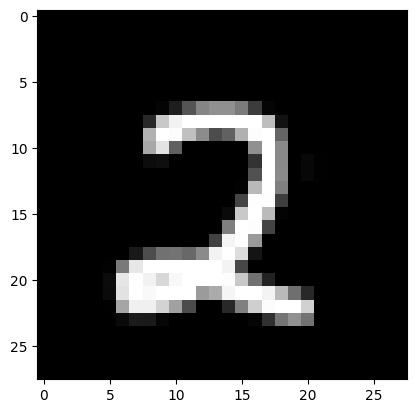

In [27]:
test_img=readImage(fn,resize=(28,28),colorMode="grayscale")

test_img_procesed=np.array(test_img,dtype=np.float32)  # DONT'T FORGET TO PREPROCESS/STANDARDIZE as above!
test_img_procesed/=255
test_img_procesed = test_img_procesed.reshape((1,-1))

plt.imshow(test_img,cmap="gray")

In [35]:
flat_test_img = test_img.reshape((1,-1))
label = id3_tree.predict(flat_test_img)
print("The id3_tree model says this is digit ",label[0])

label = gini_tree.predict(flat_test_img)
print("The gini_tree model says this is digit ",label[0])

label = gnb.predict(flat_test_img)
print("The gnb model says this is digit ",label[0])

The id3_tree model says this is digit  5
The gini_tree model says this is digit  2
The gnb model says this is digit  2
